In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display_img(img):
    plt.figure(figsize=(10,8))
    plt.imshow(img)

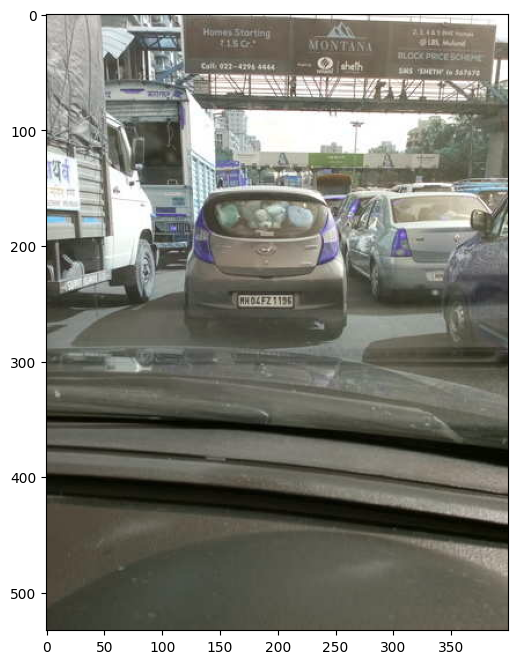

In [8]:
car=cv2.imread("car.jpg")
display_img(car)

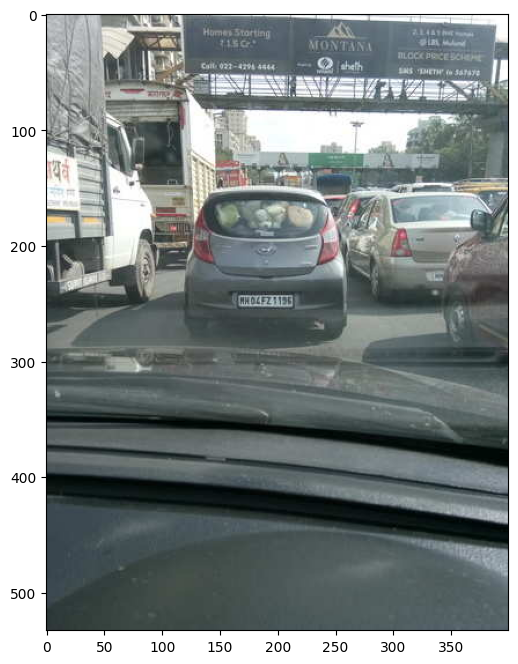

In [42]:
car=cv2.cvtColor(car,cv2.COLOR_BGR2RGB)
display_img(car)

In [43]:
numberplate_cascade=cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

In [47]:
def detect_plate(img):
    numberplate=car.copy()
    numberplate_rects=numberplate_cascade.detectMultiScale(numberplate,minNeighbors=4)
    for (x,y,w,h) in numberplate_rects:
        cv2.rectangle(numberplate,(x,y),(x+w,y+h),(255,0,0),3)
    return numberplate

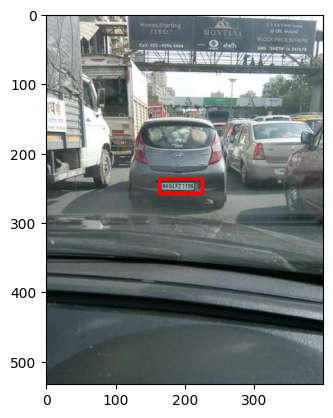

In [48]:
result=detect_plate(car)
plt.imshow(result)

In [57]:
def blured_number_plate(img):
    numberplate_img=car.copy()
    roi=car.copy()
    numberplate_rects=numberplate_cascade.detectMultiScale(numberplate_img,minNeighbors=4)
    for (x,y,w,h) in numberplate_rects:
        roi=roi[y:y+h,x:x+w]
        blurred_roi=cv2.medianBlur(roi,7)
        numberplate_img[y:y+h,x:x+w]=blurred_roi
        cv2.rectangle(numberplate_img,(x,y),(x+w,y+h),(255,0,0),3)
    return numberplate_img

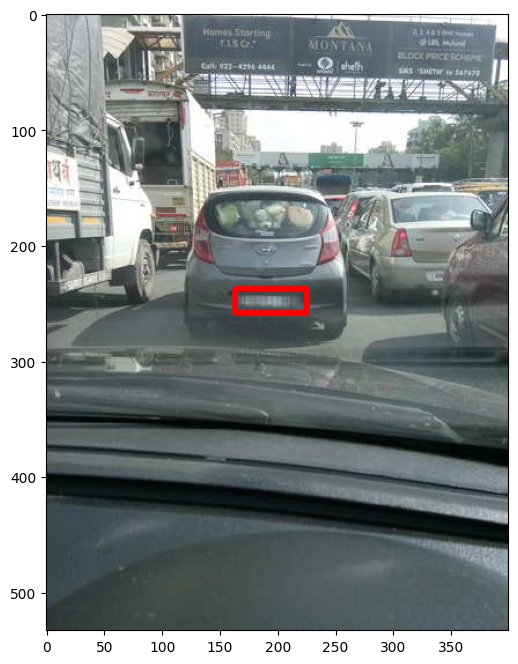

In [60]:
result=blured_number_plate(car)
display_img(result)